# Summariser

In [57]:
# parameters
playlist_url = "https://www.youtube.com/watch?v=G0Cp7DrvNLQ&list=PLFdyRStBhLEf4WF2hNyXOL_f230_xt0Pt"

# Knobs
verbose=True
synopsis_only=False
embed_videos=True

# Paths
key_path='/content/drive/MyDrive/Confidential/Keys'

from datetime import datetime
today_date = datetime.today().strftime('%Y-%m-%d')
summary_folder = f"/content/drive/MyDrive/YoutubeSummaries/{today_date}"

In [54]:
!pip install pytube openai youtube-transcript-api pytube requests pillow google-api-python-client fpdf2
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client
!sudo apt-get install wkhtmltopdf
!pip install pdfkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.


Primary method failed for https://youtube.com/watch?v=tFlAFo78xoQ. Error: Exception while accessing title of https://youtube.com/watch?v=tFlAFo78xoQ. Please file a bug report at https://github.com/pytube/pytube
Alternative method failed for https://youtube.com/watch?v=tFlAFo78xoQ. Error: HTTP Error 400: Bad Request
Primary method failed for https://youtube.com/watch?v=hHMSvSqCDKc. Error: Exception while accessing title of https://youtube.com/watch?v=hHMSvSqCDKc. Please file a bug report at https://github.com/pytube/pytube
Alternative method failed for https://youtube.com/watch?v=hHMSvSqCDKc. Error: HTTP Error 400: Bad Request
Primary method failed for https://youtube.com/watch?v=ZtxzMb9CpTM. Error: Exception while accessing title of https://youtube.com/watch?v=ZtxzMb9CpTM. Please file a bug report at https://github.com/pytube/pytube
Alternative method failed for https://youtube.com/watch?v=ZtxzMb9CpTM. Error: HTTP Error 400: Bad Request
Primary method failed for https://youtube.com/wat

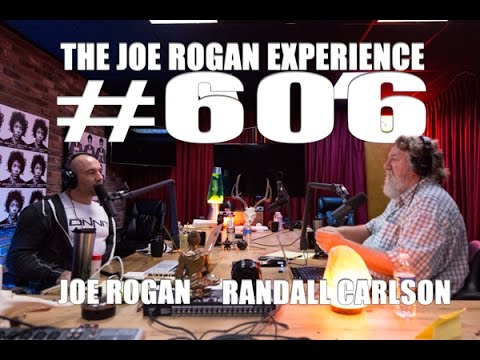

2. Joe Rogan Experience #725 - Graham Hancock & Randall Carlson : https://youtube.com/watch?v=aDejwCGdUV8


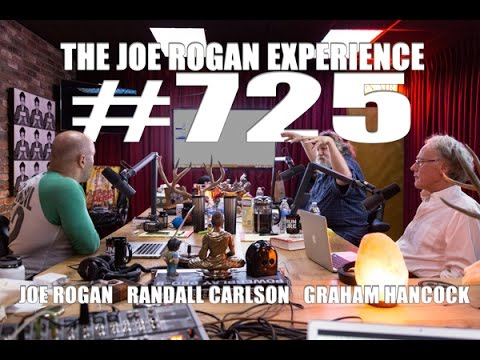

3. Joe Rogan Experience #872 - Graham Hancock & Randall Carlson : https://youtube.com/watch?v=0H5LCLljJho


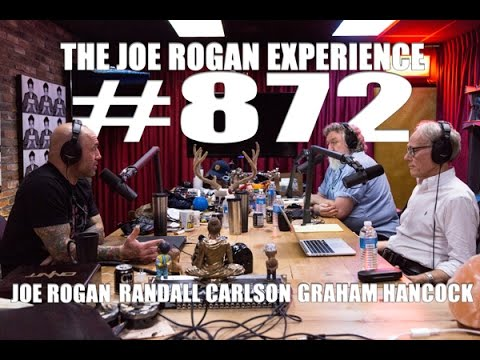

4. Joe Rogan Experience #919 - Neil deGrasse Tyson : https://youtube.com/watch?v=PhHtBqsGAoA


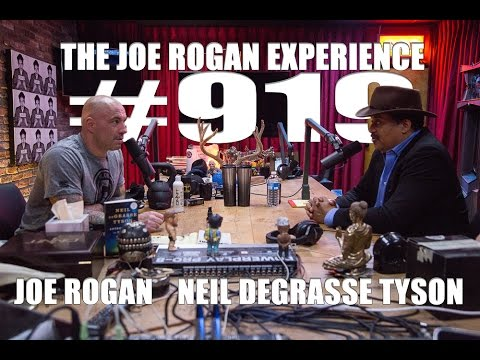

5. <title> : https://youtube.com/watch?v=tFlAFo78xoQ


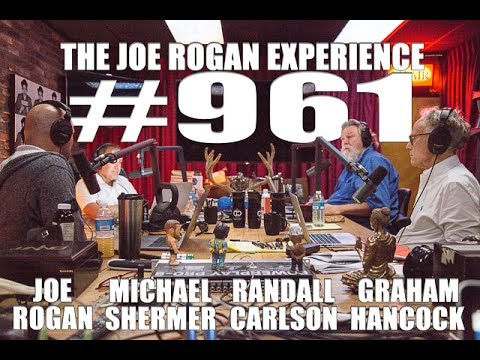

6. Joe Rogan Experience #970 - Bret Weinstein : https://youtube.com/watch?v=xq4Y87idawk


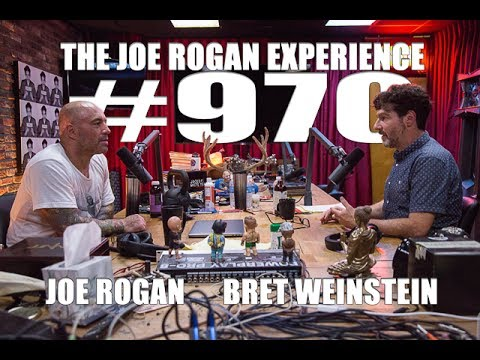

7. <title> : https://youtube.com/watch?v=hHMSvSqCDKc


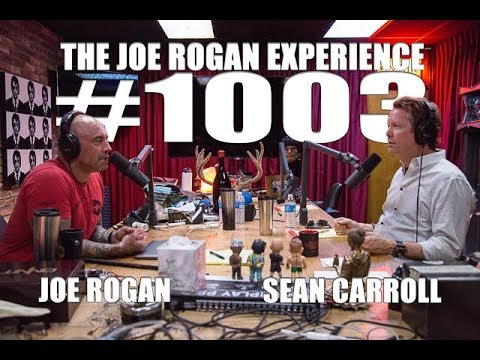

8. Joe Rogan Experience #1006 - Jordan Peterson & Bret Weinstein : https://youtube.com/watch?v=6G59zsjM2UI


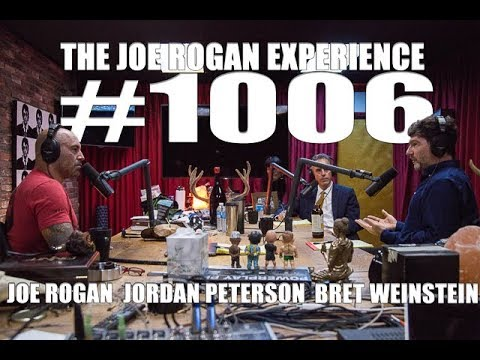

9. Joe Rogan Experience #1022 - Eric Weinstein : https://youtube.com/watch?v=lMzjEaNFbAk


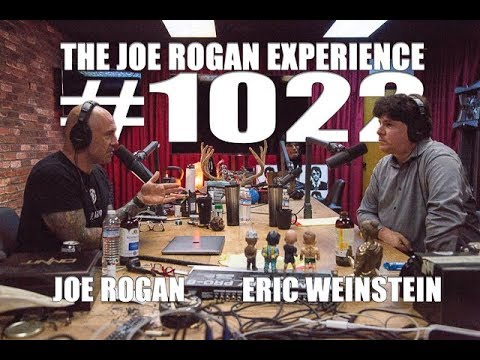

10. Joe Rogan Experience #1066 - Mel Gibson & Dr. Neil Riordan : https://youtube.com/watch?v=OtL1fEEtLaA


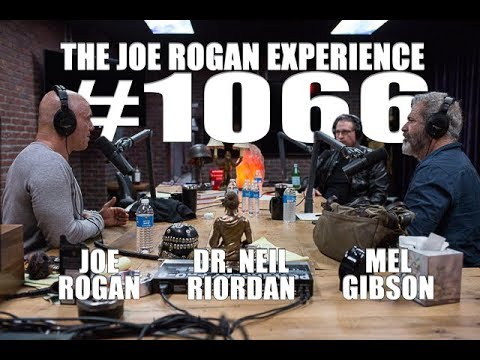

11. Joe Rogan Experience #1068 - Michael Shermer : https://youtube.com/watch?v=x2qwRJT4WGY


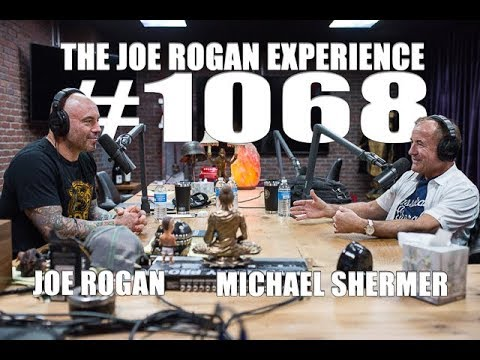

12. Joe Rogan Experience #1073 - Steven Pinker : https://youtube.com/watch?v=VUDAdOdF6Zg


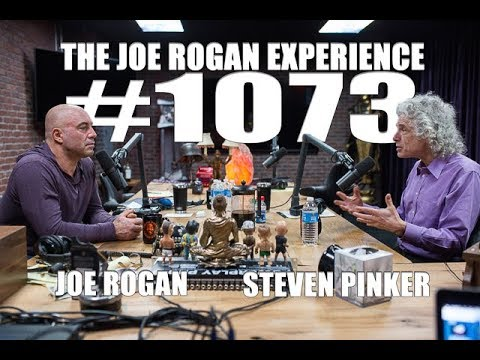

13. Joe Rogan Experience #1109 - Matthew Walker : https://youtube.com/watch?v=pwaWilO_Pig


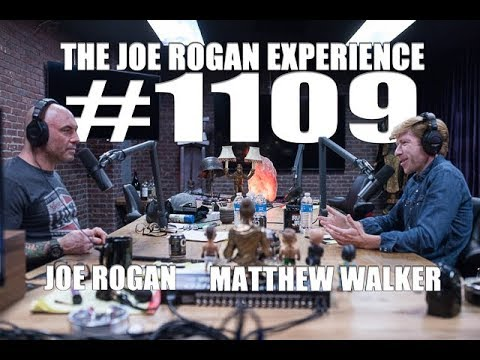

14. Joe Rogan Experience #1130 - Adam Frank : https://youtube.com/watch?v=MfHk_93x8_0


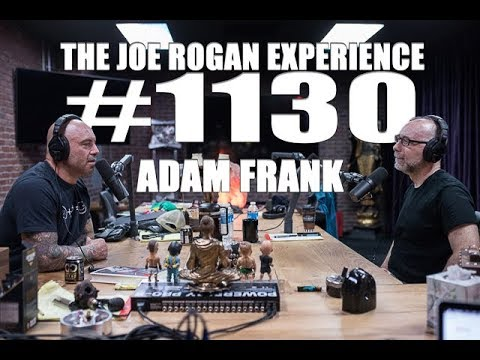

15. Joe Rogan Experience #1133 - Dennis McKenna : https://youtube.com/watch?v=9OQ6wFocx9M


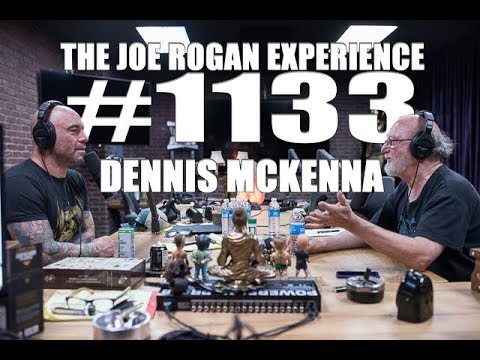

16. Joe Rogan Experience #1136 - Hamilton Morris : https://youtube.com/watch?v=HM8WDZIhs3M


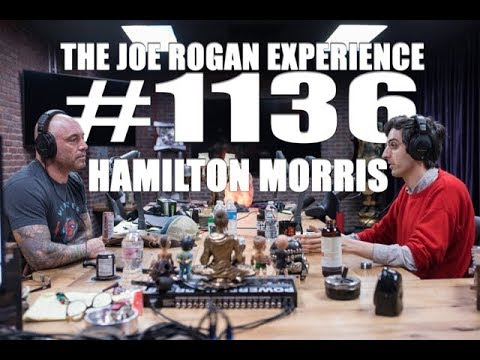

17. <title> : https://youtube.com/watch?v=ZtxzMb9CpTM


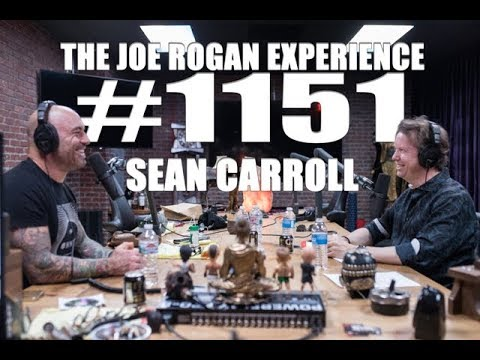

18. Joe Rogan Experience #1159 - Neil deGrasse Tyson : https://youtube.com/watch?v=vGc4mg5pul4


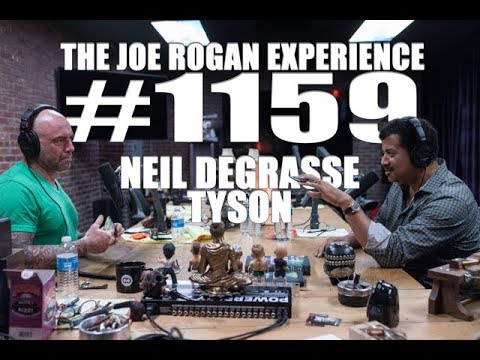

19. Joe Rogan Experience #1208 - Jordan Peterson : https://youtube.com/watch?v=vIeFt88Hm8s


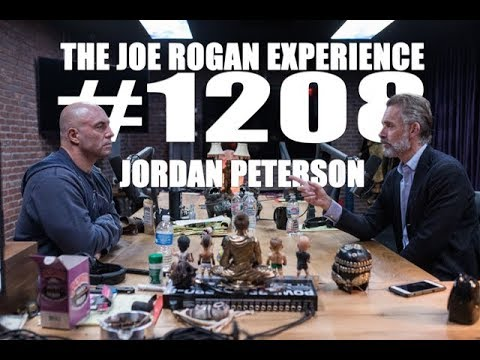

20. Joe Rogan Experience #1216 - Sir Roger Penrose : https://youtube.com/watch?v=GEw0ePZUMHA


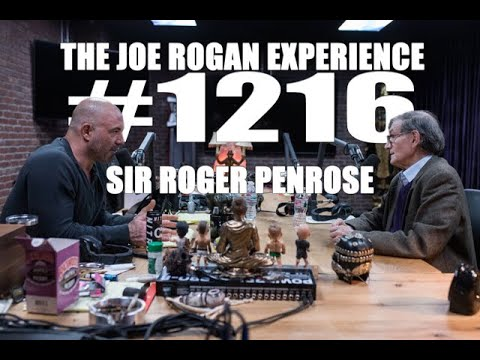

21. <title> : https://youtube.com/watch?v=wieRZoJSVtw


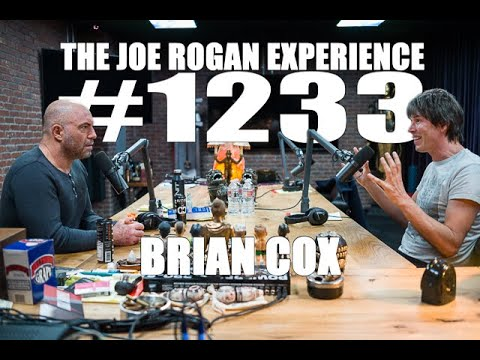

22. Joe Rogan Experience #1234 - David Sinclair : https://youtube.com/watch?v=HOTS0HS7aq4


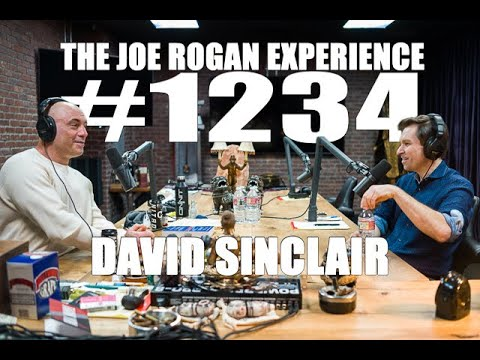

23. Joe Rogan Experience #1235 - Ben Greenfield : https://youtube.com/watch?v=8ylL8YIs7C0


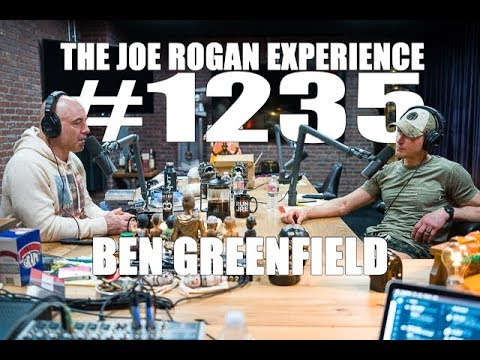

24. Joe Rogan Experience #1366 - Richard Dawkins : https://youtube.com/watch?v=_bN4spt3744


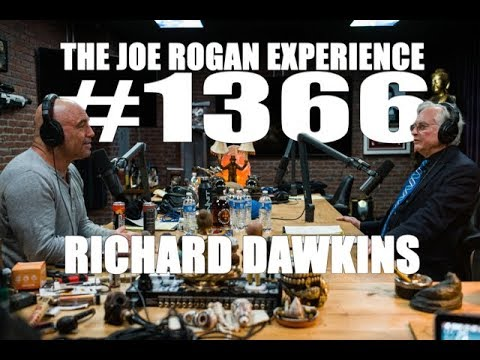

25. Joe Rogan Experience #1428 - Brian Greene : https://youtube.com/watch?v=r4wQsmAtZoc


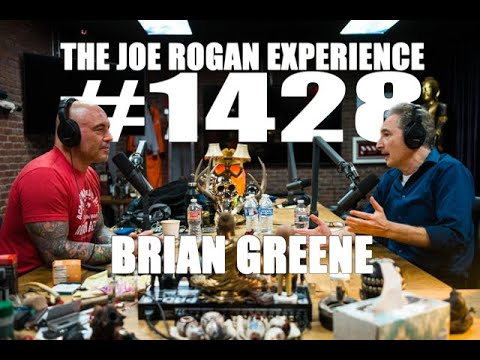

In [55]:
from pytube import Playlist
from IPython.display import YouTubeVideo, display

def get_video_urls_from_playlist(playlist_url):

    """
    Extracts video URLs from a YouTube playlist.

    Parameters:
        playlist_url (str): The URL of the YouTube playlist.

    Returns:
        tuple: A tuple containing the playlist name and a list of video data (title, and URL).
    """
    try:
        playlist = Playlist(playlist_url)
        playlist_name = playlist.title or "Unknown Playlist"
        video_data = []

        for video in playlist.videos:
            title = "<title>"
            url = video.watch_url  # Get the video URL by default
            try:
                # First attempt to get the title
                title = video.title
            except Exception as primary_error:
                print(f"Primary method failed for {url}. Error: {primary_error}")
                # Attempt an alternative method to get the title
                try:
                    title = video.streams.first().title
                except Exception as fallback_error:
                    print(f"Alternative method failed for {url}. Error: {fallback_error}")
                    # If both methods fail, title remains as "<title>"

            # Add the video data with title (or placeholder) and URL
            video_data.append((title, url))

        return playlist_name, video_data,[v[1] for v in video_data]

    except Exception as e:
        print(f"Error fetching playlist: {e}")
        return None, [], []  # Return None for playlist name and empty list for video data

# Usage
playlist_name, video_data, youtube_urls = get_video_urls_from_playlist(playlist_url)

print(f"Playlist: {playlist_name}")
print("Video URLs in the playlist:")
for idx, (title, url) in enumerate(video_data, start=1):
    print(f"{idx}. {title} : {url}")
    if embed_videos:
      video_id = url.split("v=")[1]
      display(YouTubeVideo(video_id))

In [56]:
# Import necessary packages
import openai
from youtube_transcript_api import YouTubeTranscriptApi
import re
from pytube import YouTube  # To fetch video info
import requests
from PIL import Image
from io import BytesIO
import os
import time  # For sleep
import json  # For handling JSON data
from googleapiclient.discovery import build  # Import YouTube Data API client
from tqdm import tqdm

# Install fpdf2 if not already installed
try:
    import fpdf
except ImportError:
    !pip install fpdf2

# If using Google Colab, mount Google Drive
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except ImportError:
    print("Google Colab not detected. Ensure that file paths are correctly set if not using Colab.")

def get_video_id(url):
    """
    Extracts the video ID from a YouTube URL.
    """
    regex = r"(?:v=|\/)([0-9A-Za-z_-]{11}).*"
    match = re.search(regex, url)
    if match:
        return match.group(1)
    else:
        print(f"Error: Invalid YouTube URL: {url}")
        return None

def get_transcript(video_id, language='en'):
    """
    Fetches the transcript for the given YouTube video ID.
    """
    try:
        transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
        transcript = transcript_list.find_transcript([language])
        transcript_data = transcript.fetch()
        return transcript_data  # Return the list of dictionaries
    except Exception as e:
        print(f"Error: Error fetching transcript for video ID {video_id}: {e}")
        return None

def detect_image_references_with_llm(transcript_data, openai_api_key, youtube_url, temperature=0):
    """
    Uses the LLM to detect when images are being referred to in the transcript.
    Returns a list of dictionaries with 'start' time, 'description', and 'youtube_url'.
    """
    openai.api_key = openai_api_key  # Set the API key

    # Prepare the transcript text with timestamps
    transcript_text = ""
    for item in transcript_data:
        start_time = item['start']
        text = item['text']
        transcript_text += f"[{start_time}] {text}\n"

    if synopsis_only:
      prompt = (
        "As an AI assistant, your task is to analyze the following transcript of a video. "
        "Identify all points in the transcript where the speaker refers to an image, diagram, figure, or visual aid. Especially make sure to include all graphs and scientific diagrams. "
        "In case the video is composed of slides, ensure that you refer the images of slides for the relevant part. Again, just as graphs, ensure that you do not cut down on slides."
        "For each instance, provide the timestamp (in seconds, as a number) and a brief description of the image being referred to, based on the context. "
        "Output only the JSON array without any markdown formatting or code blocks.\n\n"
        "Example Output Format:\n"
        "[\n"
        "  {\"start\": 12.5, \"description\": \"Diagram illustrating the process of photosynthesis.\"},\n"
        "  {\"start\": 45.0, \"description\": \"Graph showing the increase in population over time.\"}\n"
        "]\n\n"
        "Transcript:\n"
        f"{transcript_text}\n\n"
        "Output:"
    )
    else:
        prompt = (
        "As an AI assistant, your task is to analyze the following transcript of a video. "
        "Identify all points in the transcript where the speaker refers to an image, diagram, figure, or visual aid, ensuring that every detail, reference, and example is captured without omission. Provide thorough descriptions for each identified visual reference, capturing even minor details."
        "In case the video is composed of slides, ensure that you refer the images of slides for the relevant part. Again, just as graphs, ensure that you do not cut down on slides."
        "For each instance, provide the timestamp (in seconds, as a number) and a brief description of the image being referred to, based on the context. "
        "Output only the JSON array without any markdown formatting or code blocks.\n\n"
        "Example Output Format:\n"
        "[\n"
        "  {\"start\": 12.5, \"description\": \"Diagram illustrating the process of photosynthesis.\"},\n"
        "  {\"start\": 45.0, \"description\": \"Graph showing the increase in population over time.\"}\n"
        "]\n\n"
        "Transcript:\n"
        f"{transcript_text}\n\n"
        "Output:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        output_text = response.choices[0].message.content.strip()

        # Debugging: Print LLM output
        if verbose:
          print("LLM Output for Image References:")
          print(output_text)

        # Parse JSON
        try:
            image_refs = json.loads(output_text)
        except json.JSONDecodeError as e:
            print(f"Error: Failed to parse JSON. LLM output was:\n{output_text}")
            raise e

        # Assign figure numbers and include YouTube URL
        for idx, ref in enumerate(image_refs):
            ref['figure_number'] = idx + 1
            ref['youtube_url'] = youtube_url  # Add YouTube URL
        return image_refs
    except Exception as e:
        print(f"Error: Error detecting image references: {e}")
        return []

def insert_figure_markers(transcript_data, image_refs):
    """
    Inserts figure markers into the transcript text.
    Returns the combined transcript text with hyperlinks to figures and descriptions.
    """
    transcript_with_markers = ''
    image_mapping = {ref['figure_number']: ref for ref in image_refs}  # Map figure numbers to refs

    for item in transcript_data:
        text = item['text']

        # Find all figure numbers in the transcript
        figure_patterns = re.findall(r'\[FIGURE (\d+)\]', text)
        for figure_number in figure_patterns:
            figure_number = int(figure_number)
            if figure_number in image_mapping:
                ref = image_mapping[figure_number]
                youtube_url = ref['youtube_url']
                description = ref['description']
                timestamp_url = f"{youtube_url}&t={int(ref['start'])}"  # Create timestamp URL
                # Replace [FIGURE X] with a hyperlink
                hyperlink_text = f'<a href="{timestamp_url}">[FIGURE {figure_number}: {description}]</a>'
                # Replace the original text reference with the hyperlink
                text = text.replace(f"[FIGURE {figure_number}]", hyperlink_text)

        transcript_with_markers += text + ' '

    return transcript_with_markers.strip()

def combine_reports(partial_reports, image_refs, openai_api_key, temperature=0.5, retries=0, max_retries=3):
    """
    Combines partial reports into a final report using the LLM to ensure coherence.
    Preserves image_refs for hyperlinking.
    """
    openai.api_key = openai_api_key  # Set the API key

    combined_text = '\n\n'.join(partial_reports)
    if verbose:
      print("Combining partial reports into final report...")

    if synopsis_only:
      prompt = (
        "You are an AI assistant tasked with combining the following factual summaries into a single coherent report. "
        "Ensure that the report has a logical structure with clear headings for each section based on the content. "
        "Eliminate redundancies and ensure that transitions between sections are smooth. "
        "Present the information in a third-person narrative style, maintaining a neutral tone. "
        "Explicitly distinguish between facts and opinions, highlighting which statements are the speaker's opinions. "
        "Incorporate figure references like <a href=\"{timestamp_url}\">[FIGURE X]</a> appropriately in the final report with the relevant hyperlinks. Do not cut down on the figures and incorporate all the FIGUREs. "
        "Please ensure that the language is clear and concise, enhancing the overall readability of the report.\n\n"
        "Partial Summaries:\n"
        f"{combined_text}\n\n"
        "Final Report:"
    )
    else:
        prompt = (
        "You are an AI assistant tasked with combining the following factual summaries into a single coherent report. "
        "Ensure that the report has a logical structure with clear headings for each section based on the content. "
        "Combine the following factual summaries into a single coherent report while ensuring that no fact, example, or detail is left out. Maintain every element of the original content, ensuring that all information is preserved accurately. Avoid summarizing or condensing any factual content."
        "Present the information in a third-person narrative style, maintaining a neutral tone. "
        "Explicitly distinguish between facts and opinions, highlighting which statements are the speaker's opinions. "
        "Incorporate figure references like <a href=\"{timestamp_url}\">[FIGURE X]</a> appropriately in the final report with the relevant hyperlinks. Do not cut down on the figures and incorporate all the FIGUREs. "
        "Please ensure that the language is clear and concise, enhancing the overall readability of the report.\n\n"
        "Partial Summaries:\n"
        f"{combined_text}\n\n"
        "Final Report:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        final_report = response.choices[0].message.content.strip()
        if verbose:
          print("Final report generated.")
        return final_report
    except Exception as e:
        print(f"Error : Error combining reports: {e}")
        return combined_text  # Return combined partial reports if error occurs

def chunk_text(text, max_words=4000, overlap_words=200):
    """
    Splits the text into chunks based on word count, with overlaps.
    """
    words = text.split()
    chunks = []
    start = 0
    while start < len(words):
        end = start + max_words
        chunk = ' '.join(words[start:end])
        chunks.append(chunk)
        start = end - overlap_words  # Overlap
    return chunks

def process_chunk(chunk, idx, openai_api_key, temperature=0, retries=0, max_retries=3):
    """
    Processes a single chunk with the LLM to generate a partial report.
    """
    openai.api_key = openai_api_key  # Set the API key

    if synopsis_only:
      prompt = (
        "You are an AI assistant tasked with creating a factual summary of the following transcript segment "
        "from a YouTube video. The segment may include the video's description and the channel's description, "
        "followed by the transcript. Use this information to enhance the summary. "
        "Extract the core facts and present them in third-person narration. "
        "Explicitly distinguish between facts and opinions, highlighting which statements are the speaker's opinions. "
        "Include the name of the speaker if available; otherwise, refer to them as 'the speaker' or 'the narrator'.\n\n"
        "Note: The transcript may include markers like <a href=\"{timestamp_url}\">[FIGURE X]</a>, which indicate that an image [Figure X] is being referred to. "
        "Please include these figure references appropriately in the summary.\n\n"
        "Transcript Segment:\n"
        f"{chunk}\n\n"
        "Factual Summary:"
    )
    else:
      prompt = (
        "You are an AI assistant tasked with creating a factual summary of the following transcript segment "
        "from a YouTube video. The segment may include the video's description and the channel's description, "
        "followed by the transcript. Use this information to enhance the summary. "
        "Extract every fact, example, and detail, and present them in a comprehensive manner using third-person narration. Ensure that no information is omitted or summarized. Include every point the speaker makes, and represent the content with full fidelity to the original transcript."
        "Explicitly distinguish between facts and opinions, highlighting which statements are the speaker's opinions. "
        "Include the name of the speaker if available; otherwise, refer to them as 'the speaker' or 'the narrator'.\n\n"
        "Note: The transcript may include markers like <a href=\"{timestamp_url}\">[FIGURE X]</a>, which indicate that an image [Figure X] is being referred to. "
        "Please include these figure references appropriately in the summary.\n\n"
        "Transcript Segment:\n"
        f"{chunk}\n\n"
        "Factual Summary:"
    )


    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        summary_text = response.choices[0].message.content.strip()
        if verbose:
          print(f"Chunk {idx + 1} processed.")
        return summary_text
    except Exception as e:
        print(f"Error: Error processing chunk {idx + 1}: {e}")
        if retries < max_retries:
            if verbose:
              print(f"Error: Retrying chunk {idx + 1} ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return process_chunk(chunk, idx, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Error: Failed to process chunk {idx + 1} after {max_retries} retries.")
            return None

def summarize_chunks(chunks, openai_api_key, temperature=0.5):
    """
    Processes each chunk with the LLM to generate partial reports.
    """
    partial_reports = []
    for idx, chunk in enumerate(chunks):
        summary = process_chunk(chunk, idx, openai_api_key, temperature)
        if summary:
            partial_reports.append(summary)
    return partial_reports

def summarize_comments(comments, openai_api_key, temperature=0.5, retries=0, max_retries=3):
    """
    Summarizes a list of comments into one-liner statements.
    """
    openai.api_key = openai_api_key  # Set the API key

    comments_text = "\n".join([f"- {comment}" for comment in comments])

    prompt = (
        "You are an AI assistant tasked with summarizing user comments from a YouTube video. "
        "Given the list of comments below, provide a concise summary of each comment as a single line statement. "
        "Ensure that each summary captures the main sentiment or point of the original comment.\n\n"
        "Original Comments:\n"
        f"{comments_text}\n\n"
        "Summarized Comments:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        summarized_comments = response.choices[0].message.content.strip()
        # Split the summarized comments into a list
        summarized_list = [line.strip('- ').strip() for line in summarized_comments.split('\n') if line.strip()]
        if verbose:
          print("Comments summarized successfully.")
        return summarized_list
    except Exception as e:
        print(f"Error: Error summarizing comments: {e}")
        if retries < max_retries:
            if verbose:
              print(f"Retrying comment summarization ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return summarize_comments(comments, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Error: Failed to summarize comments after {max_retries} retries.")
            return comments  # Return original comments if error occurs

def structure_report_with_headings(report_text, image_refs, openai_api_key, temperature=0.5, retries=0, max_retries=3):
    """
    Structures the report into descriptive subsections without specific timestamps.
    Replaces [FIGURE X] with clickable links to the YouTube video at the specific timestamp.
    """
    openai.api_key = openai_api_key  # Set the API key

    # Create a mapping of figure numbers to descriptions and timestamps
    figure_mapping = {ref['figure_number']: {'start': ref['start'], 'description': ref['description'], 'youtube_url': ref['youtube_url']} for ref in image_refs}

    prompt = (
        "You are an AI assistant tasked with organizing a report into subsections with descriptive headings based on the content. "
        "Use the figure references provided to determine appropriate descriptions for each subsection. "
        "Ensure that each subsection heading is informative and relevant to the content without including specific timestamps.\n\n"
        "Figure References:\n"
    )

    for num, info in figure_mapping.items():
        minutes = int(info['start'] // 60)
        seconds = int(info['start'] % 60)
        timestamp = f"{minutes}:{seconds:02d}"
        prompt += f"- <a href=\"{info['youtube_url']}&t={int(info['start'])}\">FIGURE {num}: {timestamp} - {info['description']}</a>\n"

    if synopsis_only:
      prompt += (
        "\n"
        "Report Text:\n"
        f"{report_text}\n\n"
        "Organized Report with Descriptive Subsection Headings:"
      )
    else:
      prompt += (
        "\n"
        "Report Text:\n"
        f"{report_text}\n\n"
        "Organize the report into subsections with descriptive headings while preserving every detail and example provided. Ensure the complete retention of facts, figures, and nuances, so that no content is lost or minimized in the restructuring process."
    )



    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        structured_report = response.choices[0].message.content.strip()
        if verbose:
          print("Report structured with headings successfully.")
        return structured_report
    except Exception as e:
        print(f"Error: Error structuring report with headings: {e}")
        if retries < max_retries:
            if verbose:
              print(f"Retrying report structuring ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return structure_report_with_headings(report_text, image_refs, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Error: Failed to structure report after {max_retries} retries.")
            return report_text  # Return original report if error occurs

def get_video_info(url):
    """
    Fetches the video title and thumbnail URL.
    """
    try:
        yt = YouTube(url)
        title = yt.title
        thumbnail_url = yt.thumbnail_url
        return title, thumbnail_url
    except Exception as e:
        print(f"Error: Error fetching video info for URL {url}: {e}")
        return None, None

def get_video_details(video_id, youtube):
    """
    Fetches video details such as likes, description, duration, statistics, and channel ID.
    """
    try:
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_id
        )
        response = request.execute()
        if 'items' in response and len(response['items']) > 0:
            video = response['items'][0]
            # Extract required details
            likes = video['statistics'].get('likeCount', 'N/A')
            description = video['snippet'].get('description', '')
            duration = video['contentDetails'].get('duration', '')
            statistics = video['statistics']
            channel_id = video['snippet'].get('channelId', None)
            return likes, description, duration, statistics, channel_id
        else:
            print(f"Error: No video details found for video ID {video_id}.")
            return None, None, None, None, None
    except Exception as e:
        print(f"Error: Error fetching video details for video ID {video_id}: {e}")
        return None, None, None, None, None

def get_channel_details(channel_id, youtube):
    """
    Fetches channel details such as name and description.
    """
    try:
        request = youtube.channels().list(
            part="snippet,statistics",
            id=channel_id
        )
        response = request.execute()
        if 'items' in response and len(response['items']) > 0:
            channel = response['items'][0]
            name = channel['snippet'].get('title', '')
            description = channel['snippet'].get('description', '')
            statistics = channel['statistics']
            return name, description, statistics
        else:
            print(f"Error: No channel details found for channel ID {channel_id}.")
            return None, None, None
    except Exception as e:
        print(f"Error: Error fetching channel details for channel ID {channel_id}: {e}")
        return None, None, None

def get_top_comments(video_id, youtube, max_results=10):
    """
    Fetches the top comments for a video.
    """
    try:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=max_results,
            order="relevance"  # Can also use 'time' or 'relevance'
        )
        response = request.execute()
        comments = []
        if 'items' in response:
            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
                comments.append(comment)
        return comments
    except Exception as e:
        print(f"Error: Error fetching comments for video ID {video_id}: {e}")
        return []

def generate_html(reports, output_filename='output.html'):
    """
    Generates an HTML file with a thumbnail and the reports for each video.
    Ensures text wrapping and clickable hyperlinks.
    """
    # Start the HTML document
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Report</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                line-height: 1.6;
            }
            h1 {
                color: #333;
            }
            a {
                color: #1a0dab;
                text-decoration: none;
            }
            a:hover {
                text-decoration: underline;
            }
            img {
                max-width: 100%;
                height: auto;
            }
            .report {
                margin-bottom: 20px;
                border: 1px solid #ccc;
                padding: 10px;
                border-radius: 5px;
            }
            .figures {
                margin-top: 10px;
                font-weight: bold;
            }
        </style>
    </head>
    <body>
    """

    # Add Reports
    for i, report in enumerate(reports, start=1):  # Added serial number (i)
        html_content += f'<div class="report">'
        html_content += f'<h1>{i}. {report["title"]}</h1>'  # Serial number added to title

        # Add Thumbnail Image
        if report.get('thumbnail_url'):
            html_content += f'<img src="{report["thumbnail_url"]}" alt="Thumbnail" />\n'

        content = report['content']

        # Clean content to remove unwanted formatting
        content = re.sub(r'\*\*(.*?)\*\*', r'\1', content)  # Remove bold formatting
        content = re.sub(r'### ', '', content)  # Remove heading markers

        # Wrap content in paragraph tags with line breaks for better organization
        content_paragraphs = content.splitlines()
        for paragraph in content_paragraphs:
            if paragraph.strip():  # Only add non-empty lines
                html_content += f'<p>{paragraph.strip()}</p>'

        # Add figures referenced in this report at the end
        if report.get('image_refs'):
            html_content += '<div class="figures">Referenced Figures:</div>'
            for ref in report['image_refs']:
                figure_number = ref['figure_number']
                description = ref['description']
                youtube_url = ref['youtube_url']
                start_time = ref['start']
                timestamp_url = f"{youtube_url}&t={int(start_time)}"  # Create timestamp URL
                html_content += f'<p><a href="{timestamp_url}">[FIGURE {figure_number}: {description}]</a></p>'

        html_content += '</div>\n'

    # Close the HTML document
    html_content += """
    </body>
    </html>
    """

    # Write the HTML content to a file
    with open(output_filename, 'w', encoding='utf-8') as f:
        f.write(html_content)

    print(f"HTML saved as {output_filename}")
    return html_content

# Main execution

# OpenAI API key
key_file_path = f'{key_path}/openai.key'
if os.path.exists(key_file_path):
    with open(key_file_path, 'r') as file:
        openai_api_key = file.read().strip()
else:
    print(f"OpenAI key file not found at {key_file_path}.")
    openai_api_key = None

# YouTube API key
key_file_path_youtube = f'{key_path}/youtube.key'
if os.path.exists(key_file_path_youtube):
    with open(key_file_path_youtube, 'r') as file:
        youtube_api_key = file.read().strip()
else:
    print(f"YouTube API key file not found at {key_file_path_youtube}.")
    youtube_api_key = None

if not openai_api_key:
    print("Please set your OpenAI API key.")
elif not youtube_api_key:
    print("Please set your YouTube Data API key.")
else:
    reports = []
    # Loop through each URL
    for idx, youtube_url in enumerate(tqdm(youtube_urls, desc="Processing URLs")):

        if verbose:
          line_length = 40
          print('\n','.' * line_length)  # Print a line of dots above
          print(f"Processing index: {idx}")
          print('.' * line_length,'\n')  # Print a line of dots below
        video_id = get_video_id(youtube_url)
        if video_id:
            transcript_data = get_transcript(video_id)
            if transcript_data:
                # Create YouTube API client
                youtube = build('youtube', 'v3', developerKey=youtube_api_key)

                # Get video details
                likes, video_description, duration, video_statistics, channel_id = get_video_details(video_id, youtube)

                # Get channel details
                if channel_id:
                    channel_name, channel_description, channel_statistics = get_channel_details(channel_id, youtube)
                else:
                    channel_name, channel_description, channel_statistics = None, None, None

                # Get top 10 comments
                comments = get_top_comments(video_id, youtube)

                # Summarize top comments
                summarized_comments = summarize_comments(comments, openai_api_key)

                # Use LLM to detect image references and get descriptions
                image_refs = detect_image_references_with_llm(transcript_data, openai_api_key, youtube_url=youtube_url)

                # Insert figure markers into transcript text
                transcript_with_markers = insert_figure_markers(transcript_data, image_refs)

                # Enhance the transcript with video description and channel description
                enhanced_transcript = f"Video Description:\n{video_description}\n\nChannel Description:\n{channel_description}\n\nTranscript:\n{transcript_with_markers}"

                # Set word limit per chunk
                max_words_per_chunk = 4000  # Adjust this value as needed
                overlap_words = 200  # Overlap between chunks

                chunks = chunk_text(enhanced_transcript, max_words=max_words_per_chunk, overlap_words=overlap_words)
                if verbose:
                  print(f"Transcript divided into {len(chunks)} chunks.")

                # Run the summarization
                partial_reports = summarize_chunks(chunks, openai_api_key, temperature=0.2)

                if partial_reports:
                    final_report = combine_reports(partial_reports, image_refs, openai_api_key, temperature=0.2)
                    # After generating the final_report
                    if final_report:

                        # Structure the report with descriptive headings
                        structured_report = structure_report_with_headings(final_report, image_refs, openai_api_key, temperature=0.2)

                        # Get video title and thumbnail URL
                        title, thumbnail_url = get_video_info(youtube_url)

                        # Prepare reports for generate_html
                        reports.append({
                            'title': title if title else "Unknown Title",
                            'content': structured_report,
                            'thumbnail_url': thumbnail_url,  # Include thumbnail URL
                            'image_refs': image_refs  # Pass image_refs to generate clickable links
                        })

                        print(f"Processed video {idx + 1}: {title}")

                    else:
                        print("Error: Error combining reports.")
                else:
                    print("Error: Error summarizing chunks.")
            else:
                print("Error: Error fetching transcript.")
        else:
            print("Error: Error extracting video ID.")

    # Generate HTML after processing all URLs
    if reports:
        html_content = generate_html(
            reports=reports,
            output_filename=playlist_name+".html"
        )
        print("HTML generated successfully.")
    else:
        print("Error: No reports generated.")


Mounted at /content/drive


Processing URLs:   0%|          | 0/25 [00:00<?, ?it/s]


 ........................................
Processing index: 0
........................................ 

Comments summarized successfully.
LLM Output for Image References:
[
  {"start": 203.799, "description": "Discussion about recreating maps of the planet every millennium, showing changes in sea levels and ice sheets."},
  {"start": 606.36, "description": "Mention of astronomical alignments built into ancient structures like Stonehenge and Göbekli Tepe."},
  {"start": 858.32, "description": "Introduction of a graph showing oxygen isotopes in Greenland, used to study ancient climate changes."},
  {"start": 956.639, "description": "Graph showing the depth of ice cores from Greenland, with time in thousands of years before present on the right."},
  {"start": 1111.08, "description": "Graph turned on its side to show temperature changes over the last 10,000 years, with a green line for comparison."},
  {"start": 1188.919, "description": "Graph showing dramatic temperature changes betwee

Processing URLs:   0%|          | 0/25 [01:07<?, ?it/s]


KeyboardInterrupt: 

In [61]:
import os
from datetime import datetime

def generate_html(reports, output_filename='output.html'):
    """
    Generates an HTML file with a summary report for each video.
    """
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Video Summaries</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                line-height: 1.6;
            }
            h1 {
                color: #333;
            }
            a {
                color: #1a0dab;
                text-decoration: none;
            }
            a:hover {
                text-decoration: underline;
            }
            img {
                max-width: 100%;
                height: auto;
            }
            .report {
                margin-bottom: 20px;
                border: 1px solid #ccc;
                padding: 10px;
                border-radius: 5px;
            }
            .figures {
                margin-top: 10px;
                font-weight: bold;
            }
        </style>
    </head>
    <body>
    """

    for i, report in enumerate(reports, start=1):
        html_content += f'<div class="report">'
        html_content += f'<h1>{i}. {report.get("title", "Unknown Title")}</h1>'

        if report.get('thumbnail_url'):
            html_content += f'<img src="{report["thumbnail_url"]}" alt="Thumbnail" />\n'

        content = report.get('content', 'No content available')
        html_content += f'<p>{content}</p>'

        if report.get('image_refs'):
            html_content += '<div class="figures">Referenced Figures:</div>'
            for ref in report['image_refs']:
                figure_number = ref['figure_number']
                description = ref['description']
                youtube_url = ref['youtube_url']
                start_time = ref['start']
                timestamp_url = f"{youtube_url}&t={int(start_time)}"
                html_content += f'<p><a href="{timestamp_url}">[FIGURE {figure_number}: {description}]</a></p>'

        html_content += '</div>\n'

    html_content += """
    </body>
    </html>
    """

    with open(output_filename, 'w', encoding='utf-8') as file:
        file.write(html_content)

    print(f"HTML saved as {output_filename}")
    return html_content

html_content = generate_html(reports=reports, output_filename=playlist_name + ".html")

drive_folder_path = summary_folder

os.makedirs(drive_folder_path, exist_ok=True)

base_name = playlist_name

file_version = 1

while True:
    output_file_path = os.path.join(drive_folder_path, f"{base_name}.{file_version}.html")
    if not os.path.exists(output_file_path):
        break
    file_version += 1

with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML file saved at: {output_file_path}")


HTML saved as Joe Rogan Science podcast.html
HTML file saved at: /content/drive/MyDrive/YoutubeSummaries/2024-10-12/Joe Rogan Science podcast.3.html


In [95]:
import os
import pdfkit

drive_folder_path = summary_folder

os.makedirs(drive_folder_path, exist_ok=True)
html_file_path = output_file_path

base_name = playlist_name

file_version = 1

while True:
    pdf_file_path = os.path.join(drive_folder_path, f"{base_name}.{file_version}.pdf")
    if not os.path.exists(pdf_file_path):
        break
    file_version += 1

if os.path.exists(html_file_path):
    pdfkit.from_file(html_file_path, pdf_file_path)
    print(f"PDF generated successfully at: {pdf_file_path}")
else:
    print(f"HTML file not found at: {html_file_path}. Please ensure the HTML file exists.")



PDF generated successfully at: /content/drive/MyDrive/YoutubeSummaries/2024-10-12/Amazing Long videos.1.pdf


# Question Answering

In [12]:
import os
from datetime import datetime

# Parameters
query = "Tell me about Pieter Levels Digital Nomad Life."

# Knobs
today_date = datetime.today().strftime('%Y-%m-%d')
directory_path = f"/content/drive/MyDrive/YoutubeSummaries/{today_date}"

top_k = 5

key_path = '/content/drive/MyDrive/Confidential/Keys'

In [13]:
!pip install openai faiss-cpu numpy requests tqdm

In [9]:
def get_html_files_in_directory(directory_path):
    """
    Gets a list of full file paths for all .html files in a given directory and its subdirectories.

    Args:
        directory_path (str): The path of the directory to search.

    Returns:
        list: A list of full file paths for all .html files found.
    """
    html_files = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".html"):
                full_path = os.path.join(root, file)
                html_files.append(full_path)
    return html_files

html_files = get_html_files_in_directory(directory_path)

# Print the list of HTML files
for file in html_files:
    print(file)

/content/drive/MyDrive/YoutubeSummaries/2024-10-12/C.Summarised.html
/content/drive/MyDrive/YoutubeSummaries/2024-10-12/Amazing Long videos.1.html


In [10]:
# File paths for storing the index, metadata, and processed files tracker
INDEX_FILE_PATH = f"{directory_path}/vector_index.faiss"
METADATA_FILE_PATH = f"{directory_path}/vector_metadata.json"
PROCESSED_FILES_TRACKER = f"{directory_path}/processed_files.json"
HTML_FOLDER_PATH = directory_path

In [40]:
import openai
import numpy as np
import faiss
import json
import re
import os
from tqdm import tqdm
from google.colab import drive

drive.mount('/content/drive')

# OpenAI API key
key_file_path = f'{key_path}/openai.key'
if os.path.exists(key_file_path):
    with open(key_file_path, 'r') as file:
        openai_api_key = file.read().strip()
else:
    print(f"OpenAI key file not found at {key_file_path}.")
    openai_api_key = None

def extract_text_from_html(html_content, chunk_size=1500, overlap=200):
    title_match = re.search(r'<h1>(.*?)</h1>', html_content, re.DOTALL)
    title = title_match.group(1).strip() if title_match else "No Title"
    report_matches = re.findall(r'<div class="report">(.*?)</div>', html_content, re.DOTALL)
    combined_content = "\n\n".join(re.sub(r'<.*?>', '', match).strip() for match in report_matches)
    chunks = split_text_into_chunks_with_overlap(combined_content, chunk_size=chunk_size, overlap=overlap)

    return [{'title': f"{title} - Chunk {i+1}", 'content': chunk, 'chunk_index': i + 1} for i, chunk in enumerate(chunks)]

def split_text_into_chunks_with_overlap(text, chunk_size=1500, overlap=200):
    words = text.split()
    chunks = []
    start = 0

    while start < len(words):
        end = start + chunk_size
        chunks.append(' '.join(words[start:end]))
        start += chunk_size - overlap

    return chunks

def get_embedding(text, openai_api_key=openai_api_key):
    client = openai.OpenAI(api_key=openai_api_key)
    response = client.embeddings.create(input=[text], model="text-embedding-3-large")
    return np.array(response.data[0].embedding).astype(np.float32)

def store_embeddings_in_faiss(sections, openai_api_key, index_file=INDEX_FILE_PATH, metadata_file=METADATA_FILE_PATH):

    if os.path.exists(index_file):
        index = faiss.read_index(index_file)
        with open(metadata_file, 'r') as f:
            section_metadata = json.load(f)
        print("Loaded existing index and metadata.")
    else:
        embedding = get_embedding("dummy text for dimensionality", openai_api_key)
        dimension = embedding.shape[0]
        index = faiss.IndexFlatL2(dimension)
        section_metadata = {}
        print("Created new FAISS index and metadata.")

    start_idx = len(section_metadata)
    for idx, section in enumerate(sections, start=start_idx):
        embedding = get_embedding(section['content'], openai_api_key)
        dimension = embedding.shape[0]
        index.add(embedding.reshape(1, -1))
        section_metadata[str(idx)] = {
            'title': section['title'],
            'content': section['content'],
            'source': section.get('filename', 'unknown'),
            'chunk_index': section['chunk_index']
        }

    faiss.write_index(index, index_file)
    with open(metadata_file, 'w') as f:
        json.dump(section_metadata, f)

    print(f"Stored embeddings for {len(sections)} sections.")
    return index, section_metadata

def track_processed_files(html_files, tracker_file=PROCESSED_FILES_TRACKER):
    if os.path.exists(tracker_file):
        with open(tracker_file, 'r') as f:
            processed_files = set(json.load(f))
    else:
        processed_files = set()

    html_files_set = {os.path.abspath(file) for file in html_files}
    new_files = list(html_files_set - processed_files)
    if new_files:
        processed_files.update(os.path.abspath(file) for file in new_files)
        with open(tracker_file, 'w') as f:
            json.dump(list(processed_files), f)
        print(f"Updated processed files tracker with {len(new_files)} new files.")

    return new_files

def query_faiss_index(query, index, section_metadata, openai_api_key, top_k=3):
    query_embedding = get_embedding(query, openai_api_key).astype('float32')
    distances, indices = index.search(np.array([query_embedding]), top_k)

    return [(section_metadata[str(idx)]['title'], section_metadata[str(idx)]['content']) for idx in indices[0] if str(idx) in section_metadata]

def generate_answer_with_rag(query, relevant_sections, openai_api_key):
    if not relevant_sections:
        return "Answer not found."

    openai.api_key = openai_api_key
    context = "\n\n".join([f"From '{title}': {content}" for title, content in relevant_sections])
    prompt = f"Context:\n{context}\n\nQuestion: {query}\n\nAnswer:"


    client = openai.OpenAI(api_key=openai_api_key)
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        temperature=0.2
    )

    return response.choices[0].message.content.strip()

def get_title_from_faiss_output(text):

    text = text.strip()

    # Find the first occurrence of '.' and get the index
    dot_index = text.find('.')
    if dot_index != -1:
        # Extract the substring after the first dot
        extracted = text[dot_index + 1:].strip()

        # Find the first occurrence of '- Chunk' in the extracted substring
        dash_index = extracted.find('- Chunk')
        if dash_index != -1:
            # Extract the substring before '- Chunk'
            result = extracted[:dash_index].strip()
            return result
        else:
            return "Error: '- Chunk' not found."
    else:
        return "Error: Dot not found."


def answer_question(query, index, section_metadata, openai_api_key):
    relevant_sections = query_faiss_index(query, index, section_metadata, openai_api_key)

    video_titles=set([get_title_from_faiss_output(r[0]) for r in relevant_sections])
    return video_titles, generate_answer_with_rag(query, relevant_sections, openai_api_key)

def load_or_create_index(openai_api_key):
    html_files = [os.path.join(HTML_FOLDER_PATH, file) for file in os.listdir(HTML_FOLDER_PATH) if file.endswith('.html')]
    new_files = track_processed_files(html_files)
    sections = []

    for html_file in new_files:
        with open(html_file, 'r', encoding='utf-8') as file:
            html_content = file.read()
            sections.extend(extract_text_from_html(html_content))

    if sections:
        index, section_metadata = store_embeddings_in_faiss(sections, openai_api_key)
    elif os.path.exists(INDEX_FILE_PATH) and os.path.exists(METADATA_FILE_PATH):
        index = faiss.read_index(INDEX_FILE_PATH)
        with open(METADATA_FILE_PATH, 'r') as f:
            section_metadata = json.load(f)
        print("Loaded existing index and metadata.")
    else:
        index = None
        section_metadata = None
        print("No new HTML files and no existing index. Please add some files to process.")

    return index, section_metadata

if __name__ == "__main__":
    key_file_path = f'{key_path}/openai.key'
    openai_api_key = None
    if os.path.exists(key_file_path):
        with open(key_file_path, 'r') as file:
            openai_api_key = file.read().strip()

    index, section_metadata = load_or_create_index(openai_api_key)

    if index and section_metadata:
        titles, answer = answer_question(query, index, section_metadata, openai_api_key)
        print(f"Final Answer: {answer}")
        print(f"Answe was found in the following titles : ")
        for idx,title in enumerate(titles):
            print(f"{idx+1} : {title}")
    else:
        print("FAISS index or metadata is not loaded properly.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded existing index and metadata.
Final Answer: Pieter Levels is known for his digital nomad lifestyle, which involves living and working in various locations around the world. He has lived in over 40 countries and 150 cities, often working from his laptop in casual settings like hotel rooms. This lifestyle allows him to quickly develop and launch products without the constraints of a traditional office environment or the need for corporate approvals. Levels embraces the freedom and flexibility that come with being a digital nomad, although he acknowledges that it can be both exciting and anxiety-inducing. He enjoys the novelty of travel and the opportunity to experience different cultures, which he believes can inspire innovation and creativity. Despite the challenges, he has fond memories of working late into the night with friends in places like Bali, fu

# Trending Videos

In [96]:
# parameters
max_results = 10

In [97]:
from googleapiclient.discovery import build

def find_trending_videos_in_playlist(api_key, playlist_id, max_results=10):
    """
    Fetches videos from a YouTube playlist and ranks them by popularity.

    Args:
        api_key (str): YouTube Data API key.
        playlist_id (str): The ID of the YouTube playlist.
        max_results (int): Maximum number of videos to fetch and rank.

    Returns:
        list: A sorted list of dictionaries containing video details ranked by view count.
    """
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Step 1: Fetch playlist items
    request = youtube.playlistItems().list(
        part="snippet",
        playlistId=playlist_id,
        maxResults=max_results
    )
    response = request.execute()

    videos = []

    # Step 2: Extract video IDs and fetch video details
    for item in response.get('items', []):
        video_id = item['snippet']['resourceId']['videoId']

        # Fetch video statistics
        video_request = youtube.videos().list(
            part="snippet,statistics",
            id=video_id
        )
        video_response = video_request.execute()

        if video_response['items']:
            video = video_response['items'][0]
            videos.append({
                'title': video['snippet']['title'],
                'video_id': video_id,
                'view_count': int(video['statistics'].get('viewCount', 0)),
                'like_count': int(video['statistics'].get('likeCount', 0)),
                'comment_count': int(video['statistics'].get('commentCount', 0))
            })

    # Step 3: Sort videos by view count (or any other metric)
    videos.sort(key=lambda x: x['view_count'], reverse=True)

    return videos


In [98]:
import re

def extract_playlist_id(playlist_url):
    """
    Extracts the playlist ID from a YouTube playlist URL.

    Args:
        playlist_url (str): The URL of the YouTube playlist.

    Returns:
        str: The extracted playlist ID, or None if not found.
    """
    # Regular expression to match the 'list' parameter in the URL
    match = re.search(r"[?&]list=([a-zA-Z0-9_-]+)", playlist_url)
    if match:
        return match.group(1)
    else:
        print("No playlist ID found in the provided URL.")
        return None


if __name__ == "__main__":

    api_key = youtube_api_key
    playlist_id = extract_playlist_id(playlist_url)

    trending_videos = find_trending_videos_in_playlist(api_key, playlist_id, max_results)

    print("Trending videos in the playlist:")
    for idx, video in enumerate(trending_videos, start=1):
        print(f"{idx}. {video['title']} (Views: {video['view_count']}, Likes: {video['like_count']}, Comments: {video['comment_count']})")
        print(f"Watch: https://www.youtube.com/watch?v={video['video_id']}\n")


Trending videos in the playlist:
1. Elon Musk: War, AI, Aliens, Politics, Physics, Video Games, and Humanity | Lex Fridman Podcast #400 (Views: 12026315, Likes: 183369, Comments: 21644)
Watch: https://www.youtube.com/watch?v=JN3KPFbWCy8

2. Jeff Bezos: Amazon and Blue Origin | Lex Fridman Podcast #405 (Views: 4675584, Likes: 100425, Comments: 10787)
Watch: https://www.youtube.com/watch?v=DcWqzZ3I2cY

3. Mark Zuckerberg: First Interview in the Metaverse | Lex Fridman Podcast #398 (Views: 2906479, Likes: 76164, Comments: 11443)
Watch: https://www.youtube.com/watch?v=MVYrJJNdrEg

4. Sam Altman: OpenAI, GPT-5, Sora, Board Saga, Elon Musk, Ilya, Power & AGI | Lex Fridman Podcast #419 (Views: 2268789, Likes: 46047, Comments: 7923)
Watch: https://www.youtube.com/watch?v=jvqFAi7vkBc

5. Lee Cronin: Controversial Nature Paper on Evolution of Life and Universe | Lex Fridman Podcast #404 (Views: 1631678, Likes: 13091, Comments: 2137)
Watch: https://www.youtube.com/watch?v=CGiDqhSdLHk

6. Walter I

# Individual

In [ ]:
# Import necessary packages
import openai
from youtube_transcript_api import YouTubeTranscriptApi
import re
from pytube import YouTube  # To fetch video info
import requests
from PIL import Image
from io import BytesIO
import os
import time  # For sleep
import json  # For handling JSON data
from googleapiclient.discovery import build  # Import YouTube Data API client

# Install fpdf2 if not already installed
try:
    import fpdf
except ImportError:
    !pip install fpdf2

# If using Google Colab, mount Google Drive
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except ImportError:
    print("Google Colab not detected. Ensure that file paths are correctly set if not using Colab.")

def get_video_id(url):
    """
    Extracts the video ID from a YouTube URL.
    """
    regex = r"(?:v=|\/)([0-9A-Za-z_-]{11}).*"
    match = re.search(regex, url)
    if match:
        return match.group(1)
    else:
        print(f"Invalid YouTube URL: {url}")
        return None

def get_transcript(video_id, language='en'):
    """
    Fetches the transcript for the given YouTube video ID.
    """
    try:
        transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
        transcript = transcript_list.find_transcript([language])
        transcript_data = transcript.fetch()
        return transcript_data  # Return the list of dictionaries
    except Exception as e:
        print(f"Error fetching transcript for video ID {video_id}: {e}")
        return None

def detect_image_references_with_llm(transcript_data, openai_api_key, youtube_url, temperature=0):
    """
    Uses the LLM to detect when images are being referred to in the transcript.
    Returns a list of dictionaries with 'start' time, 'description', and 'youtube_url'.
    """
    openai.api_key = openai_api_key  # Set the API key

    # Prepare the transcript text with timestamps
    transcript_text = ""
    for item in transcript_data:
        start_time = item['start']
        text = item['text']
        transcript_text += f"[{start_time}] {text}\n"

    prompt = (
        "As an AI assistant, your task is to analyze the following transcript of a video. "
        "Identify all points in the transcript where the speaker refers to an image, diagram, figure, or visual aid. "
        "For each instance, provide the timestamp (in seconds, as a number) and a brief description of the image being referred to, based on the context. "
        "Output only the JSON array without any markdown formatting or code blocks.\n\n"
        "Example Output Format:\n"
        "[\n"
        "  {\"start\": 12.5, \"description\": \"Diagram illustrating the process of photosynthesis.\"},\n"
        "  {\"start\": 45.0, \"description\": \"Graph showing the increase in population over time.\"}\n"
        "]\n\n"
        "Transcript:\n"
        f"{transcript_text}\n\n"
        "Output:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        output_text = response.choices[0].message.content.strip()

        # Debugging: Print LLM output
        print("LLM Output for Image References:")
        print(output_text)

        # Parse JSON
        try:
            image_refs = json.loads(output_text)
        except json.JSONDecodeError as e:
            print(f"Failed to parse JSON. LLM output was:\n{output_text}")
            raise e

        # Assign figure numbers and include YouTube URL
        for idx, ref in enumerate(image_refs):
            ref['figure_number'] = idx + 1
            ref['youtube_url'] = youtube_url  # Add YouTube URL
        return image_refs
    except Exception as e:
        print(f"Error detecting image references: {e}")
        return []

def insert_figure_markers(transcript_data, image_refs):
    """
    Inserts figure markers into the transcript text.
    Returns the combined transcript text with [FIGURE X] markers.
    """
    transcript_with_markers = ''
    image_starts = {ref['start']: ref['figure_number'] for ref in image_refs}

    for item in transcript_data:
        text = item['text']
        start = item['start']
        # Check if this 'start' is close to any image reference start time
        figure_number = None
        for img_start in image_starts:
            if abs(start - img_start) < 1.0:  # Allow a small time difference
                figure_number = image_starts[img_start]
                break
        if figure_number:
            text += f' [FIGURE {figure_number}]'
        transcript_with_markers += text + ' '
    return transcript_with_markers.strip()

def chunk_text(text, max_words=2000, overlap_words=200):
    """
    Splits the text into chunks based on word count, with overlaps.
    """
    words = text.split()
    chunks = []
    start = 0
    while start < len(words):
        end = start + max_words
        chunk = ' '.join(words[start:end])
        chunks.append(chunk)
        start = end - overlap_words  # Overlap
    return chunks

def process_chunk(chunk, idx, openai_api_key, temperature=0, retries=0, max_retries=3):
    """
    Processes a single chunk with the LLM to generate a partial report.
    """
    openai.api_key = openai_api_key  # Set the API key

    prompt = (
        "You are an AI assistant tasked with creating a factual summary of the following transcript segment "
        "from a YouTube video. The segment may include the video's description and the channel's description, "
        "followed by the transcript. Use this information to enhance the summary. "
        "Extract the core facts and present them in third-person narration. "
        "Explicitly distinguish between facts and opinions, highlighting which statements are the speaker's opinions. "
        "Include the name of the speaker if available; otherwise, refer to them as 'the speaker' or 'the narrator'.\n\n"
        "Note: The transcript may include markers like [FIGURE X], which indicate that an image (Figure X) is being referred to. "
        "Please include these figure references appropriately in the summary.\n\n"
        "Transcript Segment:\n"
        f"{chunk}\n\n"
        "Factual Summary:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        summary_text = response.choices[0].message.content.strip()
        print(f"Chunk {idx + 1} processed.")
        return summary_text
    except Exception as e:
        print(f"Error processing chunk {idx + 1}: {e}")
        if retries < max_retries:
            print(f"Retrying chunk {idx + 1} ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return process_chunk(chunk, idx, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Failed to process chunk {idx + 1} after {max_retries} retries.")
            return None

def summarize_chunks(chunks, openai_api_key, temperature=0.5):
    """
    Processes each chunk with the LLM to generate partial reports.
    """
    partial_reports = []
    for idx, chunk in enumerate(chunks):
        summary = process_chunk(chunk, idx, openai_api_key, temperature)
        if summary:
            partial_reports.append(summary)
    return partial_reports

def combine_reports(partial_reports, image_refs, openai_api_key, temperature=0.5, retries=0, max_retries=3):
    """
    Combines partial reports into a final report using the LLM to ensure coherence.
    Preserves image_refs for hyperlinking.
    """
    openai.api_key = openai_api_key  # Set the API key

    combined_text = '\n\n'.join(partial_reports)
    print("Combining partial reports into final report...")

    prompt = (
        "You are an AI assistant tasked with combining the following factual summaries into a single coherent report. "
        "Ensure that the report has a logical structure with clear headings for each section based on the content. "
        "Eliminate redundancies and ensure that transitions between sections are smooth. "
        "Present the information in a third-person narrative style, maintaining a neutral tone. "
        "Explicitly distinguish between facts and opinions, highlighting which statements are the speaker's opinions. "
        "Incorporate figure references like [FIGURE X] appropriately in the final report with the relevant hyperlinks. "
        "Please ensure that the language is clear and concise, enhancing the overall readability of the report.\n\n"
        "Partial Summaries:\n"
        f"{combined_text}\n\n"
        "Final Report:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        final_report = response.choices[0].message.content.strip()
        print("Final report generated.")
        return final_report
    except Exception as e:
        print(f"Error combining reports: {e}")
        if retries < max_retries:
            print(f"Retrying to combine reports ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return combine_reports(partial_reports, image_refs, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Failed to combine reports after {max_retries} retries.")
            return combined_text  # Return combined partial reports if error occurs


def summarize_comments(comments, openai_api_key, temperature=0.5, retries=0, max_retries=3):
    """
    Summarizes a list of comments into one-liner statements.
    """
    openai.api_key = openai_api_key  # Set the API key

    comments_text = "\n".join([f"- {comment}" for comment in comments])

    prompt = (
        "You are an AI assistant tasked with summarizing user comments from a YouTube video. "
        "Given the list of comments below, provide a concise summary of each comment as a single line statement. "
        "Ensure that each summary captures the main sentiment or point of the original comment.\n\n"
        "Original Comments:\n"
        f"{comments_text}\n\n"
        "Summarized Comments:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        summarized_comments = response.choices[0].message.content.strip()
        # Split the summarized comments into a list
        summarized_list = [line.strip('- ').strip() for line in summarized_comments.split('\n') if line.strip()]
        print("Comments summarized successfully.")
        return summarized_list
    except Exception as e:
        print(f"Error summarizing comments: {e}")
        if retries < max_retries:
            print(f"Retrying comment summarization ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return summarize_comments(comments, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Failed to summarize comments after {max_retries} retries.")
            return comments  # Return original comments if error occurs

def structure_report_with_headings(report_text, image_refs, openai_api_key, temperature=0.5, retries=0, max_retries=3):
    """
    Structures the report into descriptive subsections without specific timestamps.
    Replaces [FIGURE X] with clickable links to the YouTube video at the specific timestamp.
    """
    openai.api_key = openai_api_key  # Set the API key

    # Create a mapping of figure numbers to descriptions and timestamps
    figure_mapping = {ref['figure_number']: {'start': ref['start'], 'description': ref['description'], 'youtube_url': ref['youtube_url']} for ref in image_refs}

    prompt = (
        "You are an AI assistant tasked with organizing a report into subsections with descriptive headings based on the content. "
        "Use the figure references provided to determine appropriate descriptions for each subsection. "
        "Ensure that each subsection heading is informative and relevant to the content without including specific timestamps.\n\n"
        "Figure References:\n"
    )

    for num, info in figure_mapping.items():
        minutes = int(info['start'] // 60)
        seconds = int(info['start'] % 60)
        timestamp = f"{minutes}:{seconds:02d}"
        prompt += f"- FIGURE {num}: {timestamp} - {info['description']}\n"

    prompt += (
        "\n"
        "Report Text:\n"
        f"{report_text}\n\n"
        "Organized Report with Descriptive Subsection Headings:"
    )

    try:
        client = openai.OpenAI(api_key=openai_api_key)
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            temperature=temperature
        )
        structured_report = response.choices[0].message.content.strip()
        print("Report structured with headings successfully.")
        return structured_report
    except Exception as e:
        print(f"Error structuring report with headings: {e}")
        if retries < max_retries:
            print(f"Retrying report structuring ({retries + 1}/{max_retries}) after a delay...")
            time.sleep(5)
            return structure_report_with_headings(report_text, image_refs, openai_api_key, temperature, retries + 1, max_retries)
        else:
            print(f"Failed to structure report after {max_retries} retries.")
            return report_text  # Return original report if error occurs

def get_video_info(url):
    """
    Fetches the video title and thumbnail URL.
    """
    try:
        yt = YouTube(url)
        title = yt.title
        thumbnail_url = yt.thumbnail_url
        return title, thumbnail_url
    except Exception as e:
        print(f"Error fetching video info for URL {url}: {e}")
        return None, None

def get_video_details(video_id, youtube):
    """
    Fetches video details such as likes, description, duration, statistics, and channel ID.
    """
    try:
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_id
        )
        response = request.execute()
        if 'items' in response and len(response['items']) > 0:
            video = response['items'][0]
            # Extract required details
            likes = video['statistics'].get('likeCount', 'N/A')
            description = video['snippet'].get('description', '')
            duration = video['contentDetails'].get('duration', '')
            statistics = video['statistics']
            channel_id = video['snippet'].get('channelId', None)
            return likes, description, duration, statistics, channel_id
        else:
            print(f"No video details found for video ID {video_id}.")
            return None, None, None, None, None
    except Exception as e:
        print(f"Error fetching video details for video ID {video_id}: {e}")
        return None, None, None, None, None

def get_channel_details(channel_id, youtube):
    """
    Fetches channel details such as name and description.
    """
    try:
        request = youtube.channels().list(
            part="snippet,statistics",
            id=channel_id
        )
        response = request.execute()
        if 'items' in response and len(response['items']) > 0:
            channel = response['items'][0]
            name = channel['snippet'].get('title', '')
            description = channel['snippet'].get('description', '')
            statistics = channel['statistics']
            return name, description, statistics
        else:
            print(f"No channel details found for channel ID {channel_id}.")
            return None, None, None
    except Exception as e:
        print(f"Error fetching channel details for channel ID {channel_id}: {e}")
        return None, None, None

def get_top_comments(video_id, youtube, max_results=10):
    """
    Fetches the top comments for a video.
    """
    try:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=max_results,
            order="relevance"  # Can also use 'time' or 'relevance'
        )
        response = request.execute()
        comments = []
        if 'items' in response:
            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
                comments.append(comment)
        return comments
    except Exception as e:
        print(f"Error fetching comments for video ID {video_id}: {e}")
        return []

def generate_html(reports, thumbnail_url, output_filename='output.html'):
    """
    Generates an HTML file with a thumbnail and the reports for each video.
    Ensures text wrapping and clickable hyperlinks.
    """

    # Start the HTML document
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Report</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                line-height: 1.6;
            }
            h1 {
                color: #333;
            }
            a {
                color: #1a0dab;
                text-decoration: none;
            }
            a:hover {
                text-decoration: underline;
            }
            img {
                max-width: 100%;
                height: auto;
            }
            .report {
                margin-bottom: 20px;
                border: 1px solid #ccc;
                padding: 10px;
                border-radius: 5px;
            }
        </style>
    </head>
    <body>
    """

    # Add Thumbnail Image
    if thumbnail_url:
        html_content += f'<img src="{thumbnail_url}" alt="Thumbnail" />\n'

    # Add Reports
    for report in reports:
        html_content += f'<div class="report">'
        html_content += f'<h1>{report["title"]}</h1>'

        content = report['content']

        # Clean content to remove unwanted formatting
        content = re.sub(r'\*\*(.*?)\*\*', r'\1', content)  # Remove bold formatting
        content = re.sub(r'### ', '', content)  # Remove heading markers

        # Wrap content in paragraph tags with line breaks for better organization
        content_paragraphs = content.splitlines()
        for paragraph in content_paragraphs:
            if paragraph.strip():  # Only add non-empty lines
                # Find all [FIGURE i] patterns and replace with hyperlinks
                figure_patterns = re.findall(r'\[FIGURE (\d+)\]', paragraph)
                for figure_number in figure_patterns:
                    figure_index = int(figure_number) - 1  # Get the index of the corresponding image reference
                    if 0 <= figure_index < len(report['image_refs']):
                        ref = report['image_refs'][figure_index]
                        youtube_url = ref['youtube_url']
                        start_time = ref['start']
                        description = ref['description']  # Get the description for the figure
                        timestamp_url = f"{youtube_url}&t={int(start_time)}"  # Create timestamp URL
                        # Replace [FIGURE i] with [FIGURE i: <description>] and make it a hyperlink
                        paragraph = paragraph.replace(f"[FIGURE {figure_number}]", f'<a href="{timestamp_url}">[FIGURE {figure_number}: {description}]</a>')

                html_content += f'<p>{paragraph.strip()}</p>'

        html_content += '</div>\n'

    # Close the HTML document
    html_content += """
    </body>
    </html>
    """

    # Write the HTML content to a file
    with open(output_filename, 'w', encoding='utf-8') as f:
        f.write(html_content)

    print(f"HTML saved as {output_filename}")

# Main execution

# Mount Google Drive (if using Colab)
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except ImportError:
    print("Google Colab not detected. Ensure that file paths are correctly set if not using Colab.")

# OpenAI API key
key_file_path = f'{key_path}/openai.key'
if os.path.exists(key_file_path):
    with open(key_file_path, 'r') as file:
        openai_api_key = file.read().strip()
else:
    print(f"OpenAI key file not found at {key_file_path}.")
    openai_api_key = None

# YouTube API key
key_file_path_youtube = f'{key_path}/youtube.key'
if os.path.exists(key_file_path_youtube):
    with open(key_file_path_youtube, 'r') as file:
        youtube_api_key = file.read().strip()
else:
    print(f"YouTube API key file not found at {key_file_path_youtube}.")
    youtube_api_key = None

youtube_url = "https://www.youtube.com/watch?v=vIXfYFB7aBI"

if not openai_api_key:
    print("Please set your OpenAI API key.")
elif not youtube_api_key:
    print("Please set your YouTube Data API key.")
else:
    # Define the main function
    video_id = get_video_id(youtube_url)
    if video_id:
        transcript_data = get_transcript(video_id)
        if transcript_data:
            # Create YouTube API client
            youtube = build('youtube', 'v3', developerKey=youtube_api_key)

            # Get video details
            likes, video_description, duration, video_statistics, channel_id = get_video_details(video_id, youtube)

            # Get channel details
            if channel_id:
                channel_name, channel_description, channel_statistics = get_channel_details(channel_id, youtube)
            else:
                channel_name, channel_description, channel_statistics = None, None, None

            # Get top 10 comments
            comments = get_top_comments(video_id, youtube)

            # Summarize top comments
            summarized_comments = summarize_comments(comments, openai_api_key)

            # Use LLM to detect image references and get descriptions
            image_refs = detect_image_references_with_llm(transcript_data, openai_api_key, youtube_url=youtube_url)

            # Insert figure markers into transcript text
            transcript_with_markers = insert_figure_markers(transcript_data, image_refs)

            # Enhance the transcript with video description and channel description
            enhanced_transcript = f"Video Description:\n{video_description}\n\nChannel Description:\n{channel_description}\n\nTranscript:\n{transcript_with_markers}"

            # Set word limit per chunk
            max_words_per_chunk = 2000  # Adjust this value as needed
            overlap_words = 200  # Overlap between chunks

            chunks = chunk_text(enhanced_transcript, max_words=max_words_per_chunk, overlap_words=overlap_words)
            print(f"Transcript divided into {len(chunks)} chunks.")

            # Run the summarization
            partial_reports = summarize_chunks(chunks, openai_api_key, temperature=0.5)

            if partial_reports:
                final_report = combine_reports(partial_reports, image_refs, openai_api_key, temperature=0.5)
                # After generating the final_report
                if final_report:

                    # Structure the report with descriptive headings
                    structured_report = structure_report_with_headings(final_report, image_refs, openai_api_key, temperature=0.5)

                    # Get video title and thumbnail URL
                    title, thumbnail_url = get_video_info(youtube_url)

                    # Prepare reports for generate_html
                    reports = [{
                        'title': title if title else "Unknown Title",
                        'content': structured_report,
                        'image_refs': image_refs  # Pass image_refs to generate clickable links
                    }]

                    # Now call generate_html()
                    generate_html(
                        reports=reports,
                        thumbnail_url=thumbnail_url,
                        output_filename='output.html'
                    )

                    print("HTML generated successfully.")
                else:
                    print("Error combining reports.")
            else:
                print("Error summarizing chunks.")
        else:
            print("Error fetching transcript.")
    else:
        print("Error extracting video ID.")


Mounted at /content/drive
Mounted at /content/drive
Comments summarized successfully.
LLM Output for Image References:
[
  {"start": 121.28, "description": "The cat paper from Google Brain, which introduced the concept of deep learning."},
  {"start": 374.479, "description": "ImageNet dataset, which was a large-scale dataset for training AI models."},
  {"start": 465.0, "description": "AlexNet, a deep neural network that performed well on the ImageNet Challenge."},
  {"start": 857.959, "description": "Neural algorithm of artistic style, which converted real-world photographs into the style of Van Gogh."},
  {"start": 1383.039, "description": "NeRF (Neural Radiance Fields), a method for backing out 3D structure from 2D observations."},
  {"start": 1492.76, "description": "3D reconstruction, a method for creating 3D shapes from stereo photos."},
  {"start": 1542.76, "description": "NeRF in the context of generative methods and diffusion models."},
  {"start": 1982.24, "description": "Wor